In [2]:
import datetime

In [165]:
ts

1673422260000

In [25]:
from datetime import datetime
ts = res[0][0]

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d %H:%M:%S'))

2023-01-12 01:19:00


In [32]:
df['open_time'] = df['open_time']/1000

In [43]:
df['open_time'] = df['open_time'].apply(lambda x: datetime.utcfromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S'))
df = df.set_index('open_time')
df

In [44]:
df = df.set_index('open_time')
df

,open,high,low,close,volume,close_time,quote_asset_volume,nb_trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
open_time,,,,,,,,,,,
2023-01-12 01:26:00,18202.81,18224.60,18194.79,18210.78,409.74583,1.673487e+12,7.461481e+06,8215.0,207.98249,3.787333e+06,0.0
2023-01-12 01:27:00,18211.16,18212.77,18200.00,18202.24,180.77512,1.673487e+12,3.291084e+06,4048.0,75.96779,1.383075e+06,0.0
2023-01-12 01:28:00,18202.24,18215.87,18201.13,18206.83,156.41015,1.673487e+12,2.848044e+06,4270.0,70.95850,1.292044e+06,0.0
2023-01-12 01:29:00,18206.28,18206.93,18190.49,18196.85,187.18156,1.673487e+12,3.406404e+06,4677.0,82.16349,1.495234e+06,0.0
2023-01-12 01:30:00,18197.85,18199.90,18181.37,18192.12,270.68976,1.673487e+12,4.923838e+06,6482.0,114.56346,2.084047e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-12 09:41:00,18161.85,18165.26,18158.82,18164.41,179.91307,1.673517e+12,3.267621e+06,4103.0,113.30885,2.057971e+06,0.0
2023-01-12 09:42:00,18163.66,18169.32,18158.39,18158.55,141.14118,1.673517e+12,2.563849e+06,4219.0,56.72969,1.030528e+06,0.0
2023-01-12 09:43:00,18158.55,18164.79,18158.12,18162.66,105.23076,1.673517e+12,1.911143e+06,3331.0,61.29263,1.113172e+06,0.0


In [31]:
df['open_time'] = datetime.utcfromtimestamp(df['open_time']).strftime('%Y-%m-%d %H:%M:%S')
df = df.set_index('open_time')
df

TypeError: cannot convert the series to <class 'int'>

In [27]:
from datetime import datetime
ts = res[499][0]

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d %H:%M:%S'))

2023-01-12 09:38:00


In [158]:
df['open_time'][1].datetime.fromtimestamp()

AttributeError: 'numpy.float64' object has no attribute 'datetime'

In [5]:
import time
from river.tree import HoeffdingTreeClassifier
from river.neighbors import KNNClassifier
from river.stream import iter_pandas
from river import metrics
from river import utils


import pandas as pd

In [12]:


dataset = "elec"

def print_progress(sample_id, acc, kappa,training_time,testing_time):
    print(f'Samples processed: {sample_id}')
    print(acc)
    print(kappa)
    print("total train time:" , training_time)
    print("total testing time:",testing_time)

def evaluate(stream, model, n_wait=1000, verbose=False):
    acc = metrics.Accuracy()
    acc_rolling = utils.Rolling(metrics.Accuracy(), window_size=n_wait)
    kappa = metrics.CohenKappa()
    kappa_rolling = utils.Rolling(metrics.CohenKappa(), window_size=n_wait)
    raw_results = []
    model_name = model.__class__.__name__
    list_of_trainings = []
    list_of_testings = []
    
    training_time = 0
    testing_time = 0
    for i, (x, y) in enumerate(stream):
        # Predict
        start = time.time()
        y_pred = model.predict_one(x)
        end = time.time()
        testing_time = end-start
        list_of_testings.append(testing_time)
        
        # Update metrics and results
        acc.update(y_true=y, y_pred=y_pred)
        acc_rolling.update(y_true=y, y_pred=y_pred)
        kappa.update(y_true=y, y_pred=y_pred)
        kappa_rolling.update(y_true=y, y_pred=y_pred)
        if i % n_wait == 0 and i > 0:
            if verbose:
                print_progress(i, acc, kappa)
            raw_results.append([model_name, i, acc.get(), acc_rolling.get(), kappa.get(), kappa_rolling.get(),training_time,testing_time])
        # Learn (train)
        start = time.time()
        model.learn_one(x, y)
        end = time.time()
        training_time =  end-start
        list_of_trainings.append(training_time)
        
    print_progress(i, acc, kappa,sum(list_of_trainings),sum(list_of_testings))
    return pd.DataFrame(raw_results, columns=['model', 'id', 'acc', 'acc_roll', 'kappa', 'kappa_roll','training_time','testing_time'])

# Load the data, will be transformed into a stream later
'''df = pd.read_csv("./data/"+dataset+".csv")
label_col = df.columns[-1]
feature_cols = list(df.columns)
feature_cols.pop()
X = df[feature_cols]
Y = df[label_col]

# Initialize models
knn = KNNClassifier(n_neighbors=10, window_size=100)
ht = HoeffdingTreeClassifier()
bie = BatchClassifier(window_size=100, max_models=100)'''

'df = pd.read_csv("./data/"+dataset+".csv")\nlabel_col = df.columns[-1]\nfeature_cols = list(df.columns)\nfeature_cols.pop()\nX = df[feature_cols]\nY = df[label_col]\n\n# Initialize models\nknn = KNNClassifier(n_neighbors=10, window_size=100)\nht = HoeffdingTreeClassifier()\nbie = BatchClassifier(window_size=100, max_models=100)'

In [24]:
df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,nb_trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1.673486e+12,18172.50,18179.00,18161.69,18171.58,194.55208,1.673486e+12,3.535217e+06,5185.0,95.54631,1.736206e+06,0.0
1,1.673486e+12,18170.81,18183.28,18166.87,18177.51,255.82703,1.673486e+12,4.649756e+06,5779.0,126.88759,2.306229e+06,0.0
2,1.673486e+12,18177.51,18205.00,18174.12,18189.29,512.70266,1.673487e+12,9.326483e+06,9269.0,290.06162,5.276807e+06,0.0
3,1.673487e+12,18188.54,18199.32,18180.58,18181.18,274.38902,1.673487e+12,4.991000e+06,6130.0,123.01116,2.237645e+06,0.0
4,1.673487e+12,18181.18,18186.99,18179.14,18184.00,152.72721,1.673487e+12,2.777050e+06,3899.0,72.10849,1.311178e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.673516e+12,18155.47,18156.18,18153.10,18154.49,67.75348,1.673516e+12,1.230038e+06,2435.0,25.73960,4.673053e+05,0.0
496,1.673516e+12,18155.02,18161.42,18153.52,18159.98,101.97563,1.673516e+12,1.851544e+06,3321.0,55.54866,1.008618e+06,0.0
497,1.673516e+12,18159.21,18166.23,18159.21,18163.86,127.09734,1.673516e+12,2.308520e+06,3870.0,58.72218,1.066610e+06,0.0
498,1.673516e+12,18163.30,18164.50,18160.49,18162.03,53.27288,1.673516e+12,9.675231e+05,2620.0,23.45839,4.260514e+05,0.0


In [13]:
y = final_row.close


In [14]:
final_row = df.iloc[-1]
final_row

open_time                       1.673516e+12
open                            1.816159e+04
high                            1.816538e+04
low                             1.816089e+04
close                           1.816502e+04
volume                          2.116796e+01
close_time                      1.673516e+12
quote_asset_volume              3.844828e+05
nb_trades                       5.820000e+02
Taker buy base asset volume     1.712288e+01
Taker buy quote asset volume    3.110154e+05
Ignore                          0.000000e+00
Name: 499, dtype: float64

In [15]:
X = df.drop(columns = 'close')

In [16]:
y = df.close

In [19]:
X.shape,type(X)

((500, 11), pandas.core.frame.DataFrame)

In [20]:
y.shape,type(y)

((500,), pandas.core.series.Series)

In [149]:
for i, (x, y) in enumerate(iter_pandas(X=X, y=y)):
    print(i)
    print((x,y))
    print('\n')

0
({'open_time': 1673422260000.0, 'open': 1335.56, 'high': 1335.57, 'low': 1334.39, 'volume': 141.4588, 'close_time': 1673422319999.0, 'quote_asset_volume': 188832.644254, 'nb_trades': 234.0, 'Taker buy base asset volume': 43.6966, 'Taker buy quote asset volume': 58320.625105, 'Ignore': 0.0}, 1334.51)


1
({'open_time': 1673422320000.0, 'open': 1334.51, 'high': 1334.51, 'low': 1333.49, 'volume': 456.5198, 'close_time': 1673422379999.0, 'quote_asset_volume': 608943.607848, 'nb_trades': 530.0, 'Taker buy base asset volume': 261.0467, 'Taker buy quote asset volume': 348159.109632, 'Ignore': 0.0}, 1333.98)


2
({'open_time': 1673422380000.0, 'open': 1333.97, 'high': 1334.08, 'low': 1333.97, 'volume': 69.5164, 'close_time': 1673422439999.0, 'quote_asset_volume': 92739.046282, 'nb_trades': 197.0, 'Taker buy base asset volume': 31.2377, 'Taker buy quote asset volume': 41672.650055, 'Ignore': 0.0}, 1334.04)


3
({'open_time': 1673422440000.0, 'open': 1334.04, 'high': 1334.05, 'low': 1333.85, '

In [3]:
import sys

In [23]:
model = (
    river.preprocessing.StandardScaler() |
    river.tree.HoeffdingTreeRegressor(
        grace_period=200,
        leaf_prediction='adaptive',
        model_selector_decay=0.9
    )
)
ht_results = evaluate(stream=iter_pandas(X=X, y=y),
                      model=model)

Samples processed: 499
Accuracy: 0.00%
CohenKappa: 0.00%
total train time: 0.20160579681396484
total testing time: 0.02159404754638672


In [120]:
df = pd.DataFrame(res, columns=col)
for i in col:
    df[i] = df[i].astype(float)

In [49]:
final_row.name

'2023-01-12 09:57:00'

In [58]:
acc

NameError: name 'acc' is not defined

In [149]:
def print_progress(y, y_pred, date, sample_id, acc, kappa,training_time,testing_time):
    print(f'Samples processed: {sample_id}')
    print(f'Prevision at {date}')
    print(f'Predicted value : {y_pred:.2f}')
    print(f'Real value : {y}')
    #print(acc)
    #print(kappa)
    print("total train time:" , training_time)
    print("total testing time:",testing_time)

def evaluate(stream, model, n_wait=1000, verbose=False):
    acc = metrics.Accuracy()
    acc_rolling = utils.Rolling(metrics.Accuracy(), window_size=n_wait)
    kappa = metrics.CohenKappa()
    kappa_rolling = utils.Rolling(metrics.CohenKappa(), window_size=n_wait)
    raw_results = []
    model_name = model.__class__.__name__
    list_of_trainings = []
    list_of_testings = []
    list_y = []
    list_ypred = []

    training_time = 0
    testing_time = 0
    metric = river.metrics.MAE()    
    metric_mape = river.metrics.SMAPE()

    for i, (x, y) in enumerate(stream):
        # Predict
        start = time.time()
        y_pred = model.predict_one(x)
        end = time.time()
        testing_time = end-start
        list_of_testings.append(testing_time)
        
        
        #if i % n_wait == 0 and i > 0:
        #if verbose:
        #    print_progress(i, acc, kappa)
        # Learn (train)
        start = time.time()
        list_y.append(y)
        list_ypred.append(y_pred)
        m = metric.update(y_pred, y).get()
        m2 = metric_mape.update(y_pred, y).get()
        model.learn_one(x, y)
        end = time.time()
        training_time =  end-start
        list_of_trainings.append(training_time)
        
    #print(f'Prevision at {df.iloc[-1].name}')
    #print(f'Predicted value : {y_pred:.2f}')
    #print(f'Real value : {y}')
    # Update metrics and results
    acc.update(y_true=y, y_pred=y_pred)
    acc_rolling.update(y_true=y, y_pred=y_pred)        
    kappa.update(y_true=y, y_pred=y_pred)
    kappa_rolling.update(y_true=y, y_pred=y_pred)
    raw_results.append([model_name, i, acc.get(), acc_rolling.get(), kappa.get(), kappa_rolling.get(),training_time,testing_time])
    print_progress(y, y_pred, df.iloc[-1].name,i, acc, kappa,sum(list_of_trainings),sum(list_of_testings))
    return y, y_pred, m, m2#list_y, list_ypred#pd.DataFrame(raw_results, columns=['model', 'id', 'acc', 'acc_roll', 'kappa', 'kappa_roll','training_time','testing_time'])

In [82]:
ht_results.head()

,model,id,acc,acc_roll,kappa,kappa_roll,training_time,testing_time
0,Pipeline,499,0.0,0.0,0.0,0.0,0.000237,0.000049


In [97]:
for i in range(500):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [126]:
X[:99].shape

(99, 11)

In [101]:
y = df.close
X = df.drop(columns = 'close')

In [102]:
list_y, list_ypred = evaluate(stream=iter_pandas(X=X, y=y),
                      model=model, verbose=False)

Samples processed: 599
Prevision at 2023-01-12 11:19:00
Predicted value : 18178.65
Real value : 18196.34
total train time: 0.4637761116027832
total testing time: 0.042894601821899414


In [105]:
import matplotlib.pyplot as plt

In [111]:
# Features engineering adapted to River models

features_col = list(df.columns)[-12:]
X = df[features_col].values
Y = df['close'].values
X_features = [{features_col[i] : x[i] for i in range(len(features_col))} for x in X]

In [114]:
Y.shape

(600,)

In [119]:
mae, mape, preds = get_res(model, verbose=False)


In [122]:
len(preds)

600

In [120]:
mae, mape, preds

(MAE: 38.225006,
 SMAPE: 0.210263,
 [18178.677166666683,
  18178.67522462564,
  18178.692857142873,
  18178.696981757894,
  18178.70576158942,
  18178.71519008266,
  18178.753993399358,
  18178.806754530495,
  18178.84529605265,
  18178.89124794747,
  18178.920688524606,
  18178.94229132571,
  18178.94921568629,
  18178.950831973914,
  18178.94317589578,
  18178.92235772359,
  18178.88862012988,
  18178.875737439233,
  18178.875938511337,
  18178.88946688208,
  18178.911661290334,
  18178.921304347838,
  18178.91686495178,
  18178.92767255218,
  18178.929375000014,
  18178.941504000013,
  18178.986341853048,
  18179.018899521543,
  18179.0614490446,
  18179.10034976154,
  18179.16534920636,
  18179.23877971475,
  18179.30936708862,
  18179.407077409174,
  18179.51525236594,
  18179.616157480326,
  18179.760754716994,
  18179.91604395606,
  18180.040125391864,
  18180.13632237873,
  18180.200968750014,
  18180.260000000013,
  18180.375327102818,
  18180.48139968897,
  18180.56417701865,

In [118]:
X_features[0]

{'open': 18170.81,
 'high': 18183.28,
 'low': 18166.87,
 'close': 18177.51,
 'volume': 255.82703,
 'close_time': 1673486459999.0,
 'quote_asset_volume': 4649755.6033296,
 'nb_trades': 5779.0,
 'Taker buy base asset volume': 126.88759,
 'Taker buy quote asset volume': 2306229.4800483,
 'Ignore': 0.0}

In [117]:
len(X_features)

600

In [113]:
X.shape

(600, 11)

In [109]:
def get_res(model, verbose=True):
    preds = []
    metric = river.metrics.MAE()
    metric_mape = river.metrics.SMAPE()
    for i, (x, y) in enumerate(zip(X_features, Y)):
        y_pred = model.predict_one(x)  
        preds.append(y_pred)
        if i > 3 :
            m = metric.update(y_pred, y).get()
            m2 = metric_mape.update(y_pred, y).get()
            if verbose and i%200 == 0:
                print(f'MAE at iteration {i} : {m:.3f}')
                print(f'MAPE at iteration {i} : {100*m2:.3f}%')
        model = model.learn_one(x, y)
    return metric, metric_mape, preds

In [132]:
df[:100+502].shape

(600, 11)

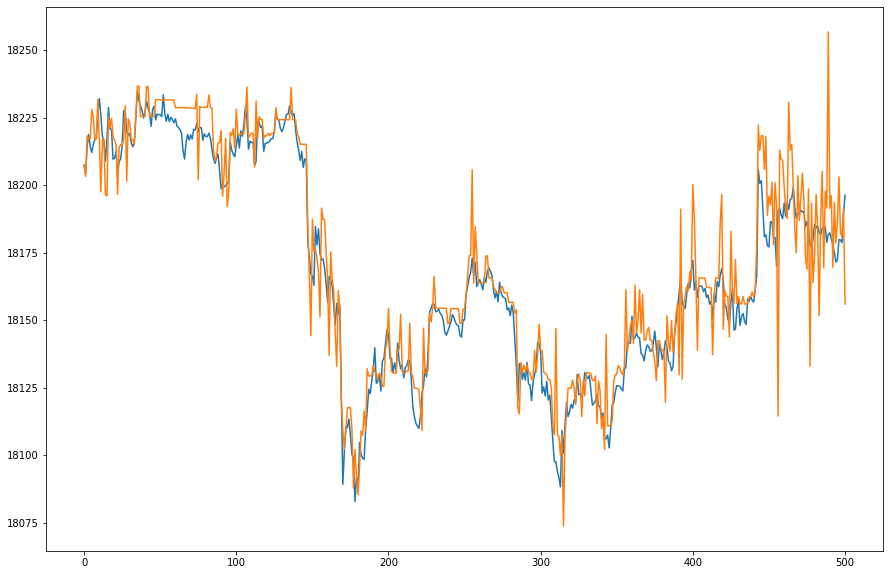

In [144]:
plt.figure(figsize = (15, 10))
plt.plot(list_y)
#plt.plot(preds[101:])
plt.plot(list_ypred)


In [146]:
metric = river.metrics.MAE()    
metric_mape = river.metrics.SMAPE()
m = metric.update(y_pred, y).get()
m2 = metric_mape.update(y_pred, y).get()

In [152]:
m, m2

(6.088355344482298, 0.03348975388278829)

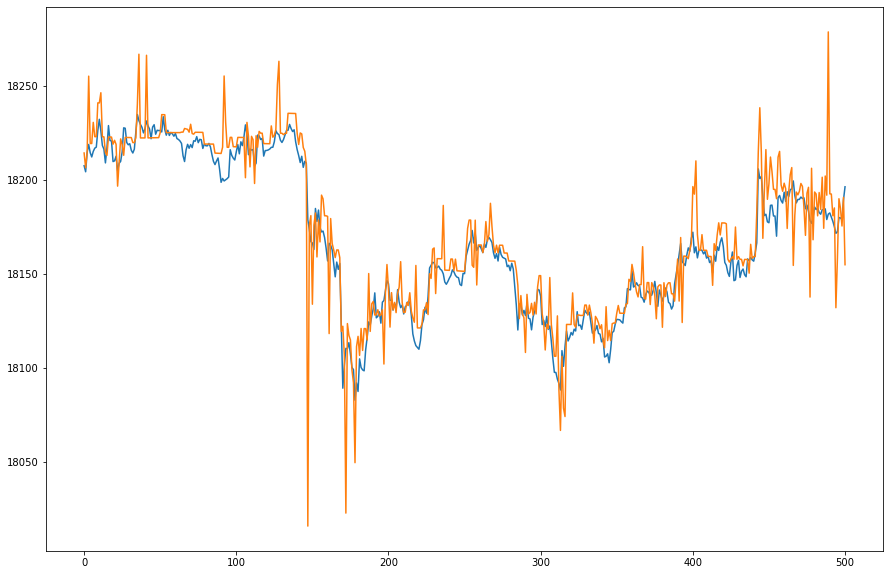

In [151]:
plt.figure(figsize = (15, 10))
plt.plot(list_y)
#plt.plot(preds[101:])
plt.plot(list_ypred)

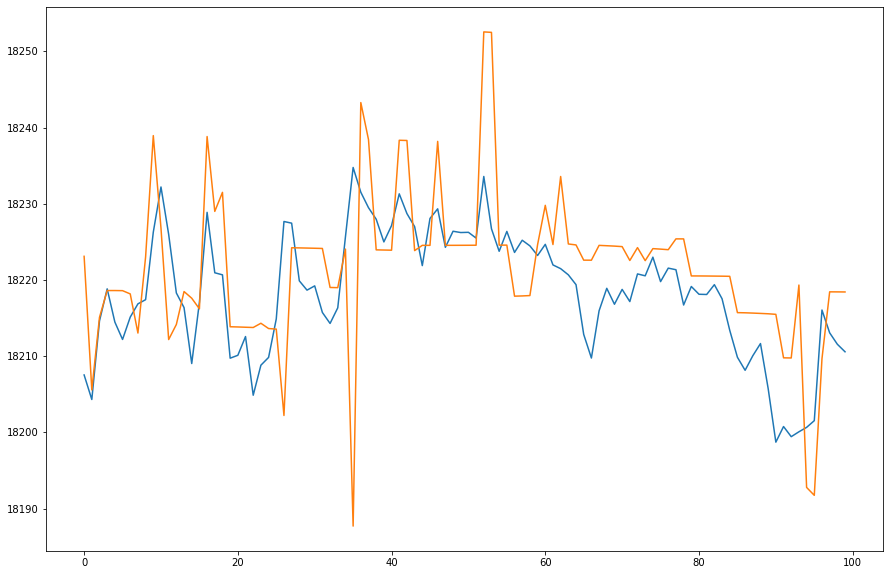

In [159]:
plt.figure(figsize = (15, 10))
plt.plot(list_y)
#plt.plot(preds[101:])
plt.plot(list_ypred)

In [ ]:
m, m2

(4.112708662776533, 0.022571974497397663)

In [154]:
len(list_ypred)

501

In [157]:
df[99:]

,open,high,low,close,volume,close_time,quote_asset_volume,nb_trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
open_time,,,,,,,,,,,
2023-01-12 02:59:00,18208.86,18211.54,18200.00,18207.54,264.61551,1.673492e+12,4.817210e+06,4865.0,132.40681,2.410461e+06,0.0
2023-01-12 03:00:00,18206.85,18209.77,18196.83,18204.32,401.96456,1.673492e+12,7.317245e+06,7594.0,196.15160,3.570804e+06,0.0
2023-01-12 03:01:00,18204.48,18220.80,18203.13,18214.63,342.28773,1.673493e+12,6.234303e+06,6868.0,188.62806,3.435572e+06,0.0
2023-01-12 03:02:00,18213.64,18221.33,18211.10,18218.84,272.14400,1.673493e+12,4.957274e+06,5567.0,141.19625,2.572020e+06,0.0
2023-01-12 03:03:00,18218.84,18219.58,18211.04,18214.48,214.65058,1.673493e+12,3.910111e+06,4617.0,91.88227,1.673782e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-12 11:15:00,18172.40,18180.00,18171.01,18179.99,124.99158,1.673522e+12,2.271676e+06,3937.0,81.14851,1.474896e+06,0.0
2023-01-12 11:16:00,18179.98,18181.57,18175.40,18179.80,136.78894,1.673522e+12,2.486679e+06,3872.0,66.70331,1.212615e+06,0.0
2023-01-12 11:17:00,18180.22,18181.28,18177.08,18178.86,96.98882,1.673522e+12,1.763175e+06,3259.0,33.65460,6.118257e+05,0.0


In [158]:
list_y = []
list_ypred = []
for i in range(100):
    y = df[i:100+i].close
    X = df[i:100+i].drop(columns = 'close')
    y, y_pred, m, m2 = evaluate(stream=iter_pandas(X=X, y=y),
                      model=model, verbose=False)
    list_y.append(y)
    list_ypred.append(y_pred)

Samples processed: 99
Prevision at 2023-01-12 11:19:00
Predicted value : 18223.11
Real value : 18207.54
total train time: 0.7405810356140137
total testing time: 0.01073455810546875
Samples processed: 99
Prevision at 2023-01-12 11:19:00
Predicted value : 18205.58
Real value : 18204.32
total train time: 0.028209924697875977
total testing time: 0.006344795227050781
Samples processed: 99
Prevision at 2023-01-12 11:19:00
Predicted value : 18215.10
Real value : 18214.63
total train time: 0.02752375602722168
total testing time: 0.006096601486206055
Samples processed: 99
Prevision at 2023-01-12 11:19:00
Predicted value : 18218.62
Real value : 18218.84
total train time: 0.03231501579284668
total testing time: 0.007409811019897461
Samples processed: 99
Prevision at 2023-01-12 11:19:00
Predicted value : 18218.62
Real value : 18214.48
total train time: 0.04692816734313965
total testing time: 0.006307125091552734
Samples processed: 99
Prevision at 2023-01-12 11:19:00
Predicted value : 18218.60
Real

In [ ]:
from calendar import c
import time
import json
import pandas as pd
import numpy as np
import river
import sys
from sklearn.metrics import mean_absolute_percentage_error
from river import preprocessing, tree, metrics

from kafka import KafkaConsumer
import time
from kafka import KafkaConsumer
import json
import pandas as pd
import river

if __name__ == '__main__':

    name = sys.argv[1]
    topic_name = 'project'
    consumer = KafkaConsumer(topic_name, bootstrap_servers="localhost:9092",value_deserializer=lambda m: json.loads(m.decode('utf-8')))#json.dumps(m).decode('utf8'))
    col = ['open_time', 'open', 'high', 'low', 'close', 'volume',
        'close_time', 'quote_asset_volume', 'nb_trades',
        'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
    model = (
            river.preprocessing.StandardScaler() |
            river.tree.HoeffdingTreeRegressor(
                grace_period=200,
                leaf_prediction='adaptive',
                model_selector_decay=0.9
            )
        )
    list_y = []
    list_ypred = []
    #metric_mae = river.metrics.MAE()
    #metric_mape = river.metrics.SMAPE()
    for i in consumer:
        res = json.loads(json.dumps(i.value))
        df = pd.DataFrame(res, columns=col)
        for i in col:
            df[i] = df[i].astype(float)
        df['open_time'] = df['open_time'].apply(lambda x: datetime.utcfromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S'))
        df = df.set_index('open_time')
        
        final_row = df.iloc[-1]
        y = df.close
        X = df.drop(columns = 'close')
        y, y_pred = evaluate(stream=iter_pandas(X=X, y=y),
                      model=model, verbose=False)
        list_y.append(y)
        list_ypred.append(y_pred)
        #print(ht_results)
        '''features = []
        for t in [5, 20, 60]:
            open_moy = df.iloc[-t:-1].open.mean()
            open_std = df.iloc[-t:-1].open.std()
            n_trades_sum = df.iloc[-t:-1]['nb_trades'].sum()
            delta = df.iloc[-t].close - df.iloc[-2].close
            feats = np.array([open_moy, open_std, n_trades_sum, delta])
            features.append(feats)
        features = np.array(features).flatten()

        #times = ['1m', '3m', '10m']
        times = ['5m', '20m', '60m']
        col_x = [[f'moy_{t}', f'std_{t}', f'n_trades_sum_{t}', f'delta_{t}'] for t in times]
        col_x = np.array(col_x).flatten()
        x = {col_x[i] : features[i] for i in range(len(features))}

        y = final_row.close
        y_pred = model.predict_one(x)
        model = model.learn_one(x, y)

        timestamp = final_row.open_time
        date = time.strftime('%A, %Y-%m-%d %H:%M:%S', time.localtime(timestamp/1000))
        print(f'Prevision at {date}')
        print(f'Predicted value : {y_pred:.2f}')
        print(f'Real value : {y}')'''
        mae = np.abs(y-y_pred)
        print(f'MAE : {mae:.2f}')
        if y_pred != 0:
            mape = 100*mean_absolute_percentage_error([y], [y_pred])
            print(f'MAPE : {mape:.2f}%')
        new_mae = metric_mae.update(y, y_pred).get()
        print(f'Current MAE : {new_mae:.2f}')
        new_smape = metric_mape.update(y, y_pred).get()
        print(f'Current SMAPE : {new_smape:.3f}%')

        results = [timestamp, y, y_pred, mae, new_mae, new_smape] + list(features)
        #print(results)
        #cols_res = ['timestamp', 'y', 'y_pred', 'mae', 'new_mae', 'new_smape'] + list(col_x)
        #df_tmp = pd.DataFrame([results], columns=cols_res)
        #df_results = pd.concat((df_results, df_tmp))

        #df_results.to_csv(f'./df_results_{name}.csv', sep=';', index=False)

          
        print()
        print('----------------------------------------------------------------------')

AttributeError: 'numpy.float64' object has no attribute 'to_numpy'

In [95]:
df.head()

,open,high,low,close,volume,close_time,quote_asset_volume,nb_trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
open_time,,,,,,,,,,,
2023-01-12 01:14:00,18155.02,18161.53,18150.00,18151.70,295.98053,1.673486e+12,5.373496e+06,6381.0,146.82900,2.665761e+06,0.0
2023-01-12 01:15:00,18151.69,18170.96,18148.60,18151.78,344.86450,1.673486e+12,6.262905e+06,6959.0,181.01433,3.287478e+06,0.0
2023-01-12 01:16:00,18152.00,18182.77,18150.42,18177.99,409.27972,1.673486e+12,7.437293e+06,8421.0,238.56243,4.335212e+06,0.0
2023-01-12 01:17:00,18178.96,18181.06,18158.31,18168.21,351.12980,1.673486e+12,6.379002e+06,6734.0,172.30123,3.130138e+06,0.0
2023-01-12 01:18:00,18168.21,18176.18,18151.41,18172.50,288.60174,1.673486e+12,5.241797e+06,6097.0,156.62948,2.844986e+06,0.0


In [96]:
df.shape

(600, 11)

In [45]:
from calendar import c
import time
import json
import pandas as pd
import numpy as np
import river
import sys
from sklearn.metrics import mean_absolute_percentage_error
from river import preprocessing, tree, metrics

from kafka import KafkaConsumer
import time
from kafka import KafkaConsumer
import json
import pandas as pd
import river

if __name__ == '__main__':

    name = sys.argv[1]
    topic_name = 'project'
    consumer = KafkaConsumer(topic_name, bootstrap_servers="localhost:9092",value_deserializer=lambda m: json.loads(m.decode('utf-8')))#json.dumps(m).decode('utf8'))
    col = ['open_time', 'open', 'high', 'low', 'close', 'volume',
        'close_time', 'quote_asset_volume', 'nb_trades',
        'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
    model = (
            river.preprocessing.StandardScaler() |
            river.tree.HoeffdingTreeRegressor(
                grace_period=200,
                leaf_prediction='adaptive',
                model_selector_decay=0.9
            )
        )
    metric_mae = river.metrics.MAE()
    metric_mape = river.metrics.SMAPE()
    for i in consumer:
        res = json.loads(json.dumps(i.value))
        df = pd.DataFrame(res, columns=col)
        for i in col:
            df[i] = df[i].astype(float)
        
        final_row = df.iloc[-1]

        features = []
        for t in [5, 20, 60]:
            open_moy = df.iloc[-t:-1].open.mean()
            open_std = df.iloc[-t:-1].open.std()
            n_trades_sum = df.iloc[-t:-1]['nb_trades'].sum()
            delta = df.iloc[-t].close - df.iloc[-2].close
            feats = np.array([open_moy, open_std, n_trades_sum, delta])
            features.append(feats)
        features = np.array(features).flatten()

        #times = ['1m', '3m', '10m']
        times = ['5m', '20m', '60m']
        col_x = [[f'moy_{t}', f'std_{t}', f'n_trades_sum_{t}', f'delta_{t}'] for t in times]
        col_x = np.array(col_x).flatten()
        x = {col_x[i] : features[i] for i in range(len(features))}

        y = final_row.close
        y_pred = model.predict_one(x)
        model = model.learn_one(x, y)

        timestamp = final_row.open_time
        date = time.strftime('%A, %Y-%m-%d %H:%M:%S', time.localtime(timestamp/1000))
        print(f'Prevision at {date}')
        print(f'Predicted value : {y_pred:.2f}')
        print(f'Real value : {y}')
        mae = np.abs(y-y_pred)
        print(f'MAE : {mae:.2f}')
        if y_pred != 0:
            mape = 100*mean_absolute_percentage_error([y], [y_pred])
            print(f'MAPE : {mape:.2f}%')
        new_mae = metric_mae.update(y, y_pred).get()
        print(f'Current MAE : {new_mae:.2f}')
        new_smape = metric_mape.update(y, y_pred).get()
        print(f'Current SMAPE : {new_smape:.3f}%')

        results = [timestamp, y, y_pred, mae, new_mae, new_smape] + list(features)
        #print(results)
        #cols_res = ['timestamp', 'y', 'y_pred', 'mae', 'new_mae', 'new_smape'] + list(col_x)
        #df_tmp = pd.DataFrame([results], columns=cols_res)
        #df_results = pd.concat((df_results, df_tmp))

        #df_results.to_csv(f'./df_results_{name}.csv', sep=';', index=False)

          
        print()
        print('----------------------------------------------------------------------')

KeyboardInterrupt: 

In [5]:
import time
from kafka import KafkaConsumer
import json
topic_name = 'project'
consumer = KafkaConsumer(topic_name, bootstrap_servers="localhost:9092",value_deserializer=lambda m: json.loads(m.decode('utf-8')))#json.dumps(m).decode('utf8'))
for i in consumer:
    print(i)

KeyboardInterrupt: 

In [74]:
model = (
    river.preprocessing.StandardScaler() |
    river.tree.HoeffdingTreeRegressor(
        grace_period=200,
        leaf_prediction='adaptive',
        model_selector_decay=0.9
    )
)
metric_mae = river.metrics.MAE()
metric_mape = river.metrics.SMAPE()
final_row = df.iloc[-1]

features = []
for t in [5, 20, 60]:
    open_moy = df.iloc[-t:-1].open.mean()
    open_std = df.iloc[-t:-1].open.std()
    n_trades_sum = df.iloc[-t:-1]['nb_trades'].sum()
    delta = df.iloc[-t].close - df.iloc[-2].close
    feats = np.array([open_moy, open_std, n_trades_sum, delta])
    features.append(feats)
features = np.array(features).flatten()

#times = ['1m', '3m', '10m']
times = ['5m', '20m', '60m']
col_x = [[f'moy_{t}', f'std_{t}', f'n_trades_sum_{t}', f'delta_{t}'] for t in times]
col_x = np.array(col_x).flatten()
x = {col_x[i] : features[i] for i in range(len(features))}

y = final_row.close
model = model.learn_one(x, y)   
y_pred = model.predict_one(x)

timestamp = final_row.open_time
date = time.strftime('%A, %Y-%m-%d %H:%M:%S', time.localtime(timestamp/1000))
print(f'Prevision at {date}')
print(f'Predicted value : {y_pred:.2f}')
print(f'Real value : {y}')
mae = np.abs(y-y_pred)
print(f'MAE : {mae:.2f}')
if y_pred != 0:
    mape = 100*mean_absolute_percentage_error([y], [y_pred])
    print(f'MAPE : {mape:.2f}%')
new_mae = metric_mae.update(y, y_pred).get()
print(f'Current MAE : {new_mae:.2f}')
new_smape = metric_mape.update(y, y_pred).get()
print(f'Current SMAPE : {new_smape:.3f}%')

results = [timestamp, y, y_pred, mae, mape, new_mae, new_smape] + list(features)
#print(results)
cols_res = ['timestamp', 'y', 'y_pred', 'mae', 'mape', 'new_mae', 'new_smape'] + list(col_x)
df_tmp = pd.DataFrame([results], columns=cols_res)
df_results = pd.concat((df_results, df_tmp))

df_results.to_csv(f'./df_results_{name}.csv', sep=';', index=False)

model = model.learn_one(x, y)   
print()
print('----------------------------------------------------------------------')

Prevision at Tuesday, 2023-01-10 19:40:00
Predicted value : 26.76
Real value : 1338.0
MAE : 1311.24
MAPE : 98.00%
Current MAE : 1311.24
Current SMAPE : 192.157%

----------------------------------------------------------------------


In [22]:
df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,nb_trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1673365140000,1332.38000000,1333.07000000,1332.38000000,1332.63000000,243.78590000,1673365199999,324906.14949500,331,165.32160000,220326.19576300,0
1,1673365200000,1332.63000000,1332.90000000,1331.82000000,1332.20000000,336.07360000,1673365259999,447757.91470700,300,263.15100000,350582.68802200,0
2,1673365260000,1332.20000000,1332.27000000,1331.41000000,1331.42000000,202.11060000,1673365319999,269141.00227500,263,75.81260000,100954.92390900,0
3,1673365320000,1331.41000000,1331.62000000,1331.11000000,1331.12000000,180.53090000,1673365379999,240361.71349200,243,47.25500000,62914.88869000,0
4,1673365380000,1331.11000000,1331.12000000,1330.44000000,1330.45000000,174.97200000,1673365439999,232871.94635400,314,51.92240000,69103.68936600,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1673370840000,1331.69000000,1332.05000000,1331.63000000,1331.76000000,600.56850000,1673370899999,799924.53604500,308,526.58820000,701398.12441000,0
96,1673370900000,1331.76000000,1331.77000000,1330.80000000,1330.80000000,206.69210000,1673370959999,275161.83537900,329,55.22180000,73515.14685300,0
97,1673370960000,1330.81000000,1330.95000000,1330.80000000,1330.94000000,86.90350000,1673371019999,115656.48473600,188,65.37380000,87002.25483800,0
98,1673371020000,1330.95000000,1330.95000000,1330.93000000,1330.93000000,48.32770000,1673371079999,64321.59105300,168,37.45750000,49854.01412100,0


In [29]:
df.iloc[-1]

open_time                       1.673371e+12
open                            1.330940e+03
high                            1.330940e+03
low                             1.330930e+03
close                           1.330940e+03
volume                          1.471900e+00
close_time                      1.673371e+12
quote_asset_volume              1.959007e+03
nb_trades                       2.500000e+01
Taker buy base asset volume     1.144500e+00
Taker buy quote asset volume    1.523261e+03
Ignore                          0.000000e+00
Name: 99, dtype: float64

In [32]:
df.iloc[-5:-1]['nb_trades']

95    308.0
96    329.0
97    188.0
98    168.0
Name: nb_trades, dtype: float64

In [41]:
x

{'moy_5m': 1331.3025,
 'std_5m': 0.49202811572783645,
 'n_trades_sum_5m': 993.0,
 'delta_5m': 0.8299999999999272,
 'moy_20m': 1330.5573684210524,
 'std_20m': 0.8342650931293022,
 'n_trades_sum_20m': 4729.0,
 'delta_20m': -0.6600000000000819,
 'moy_60m': 1330.4557627118636,
 'std_60m': 1.1955927737547662,
 'n_trades_sum_60m': 21782.0,
 'delta_60m': 1.0699999999999363}

In [40]:
final_row

open_time                       1.673371e+12
open                            1.330940e+03
high                            1.330940e+03
low                             1.330930e+03
close                           1.330940e+03
volume                          1.471900e+00
close_time                      1.673371e+12
quote_asset_volume              1.959007e+03
nb_trades                       2.500000e+01
Taker buy base asset volume     1.144500e+00
Taker buy quote asset volume    1.523261e+03
Ignore                          0.000000e+00
Name: 99, dtype: float64

In [36]:
y

1330.94

In [35]:
y_pred

0.0

In [42]:
model

Pipeline (
  StandardScaler (
    with_std=True
  ),
  HoeffdingTreeRegressor (
    grace_period=200
    max_depth=inf
    delta=1e-07
    tau=0.05
    leaf_prediction="adaptive"
    leaf_model=LinearRegression (
      optimizer=SGD (
        lr=Constant (
          learning_rate=0.01
        )
      )
      loss=Squared ()
      l2=0.
      l1=0.
      intercept_init=0.
      intercept_lr=Constant (
        learning_rate=0.01
      )
      clip_gradient=1e+12
      initializer=Zeros ()
    )
    model_selector_decay=0.9
    nominal_attributes=None
    splitter=TEBSTSplitter (
      digits=1
    )
    min_samples_split=5
    binary_split=False
    max_size=500.
    memory_estimate_period=1000000
    stop_mem_management=False
    remove_poor_attrs=False
    merit_preprune=True
  )
)

In [50]:
dataset

Donald Trump approval ratings.

This dataset was obtained by reshaping the data used by FiveThirtyEight for analyzing Donald
Trump's approval ratings. It contains 5 features, which are approval ratings collected by
5 polling agencies. The target is the approval rating from FiveThirtyEight's model. The goal of
this task is to see if we can reproduce FiveThirtyEight's model.

    Name  TrumpApproval                                                                                      
    Task  Regression                                                                                         
 Samples  1,001                                                                                              
Features  6                                                                                                  
  Sparse  False                                                                                              
    Path  /Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/

In [43]:
model = (
    river.preprocessing.StandardScaler() |
    river.tree.HoeffdingTreeRegressor(
        grace_period=200,
        leaf_prediction='adaptive',
        model_selector_decay=0.9
    )
)
metric_mae = river.metrics.MAE()
metric_mape = river.metrics.SMAPE()

In [46]:
model.predict_one(x)

0.0

In [47]:
x

{'moy_5m': 1331.3025,
 'std_5m': 0.49202811572783645,
 'n_trades_sum_5m': 993.0,
 'delta_5m': 0.8299999999999272,
 'moy_20m': 1330.5573684210524,
 'std_20m': 0.8342650931293022,
 'n_trades_sum_20m': 4729.0,
 'delta_20m': -0.6600000000000819,
 'moy_60m': 1330.4557627118636,
 'std_60m': 1.1955927737547662,
 'n_trades_sum_60m': 21782.0,
 'delta_60m': 1.0699999999999363}

In [53]:
model.predict_one(x)

0.0

In [64]:
for i in col:
    df[i] = df[i].astype(float)

final_row = df.iloc[-1]

features = []
for t in [5, 20, 60]:
    open_moy = df.iloc[-t:-1].open.mean()
    open_std = df.iloc[-t:-1].open.std()
    n_trades_sum = df.iloc[-t:-1]['nb_trades'].sum()
    delta = df.iloc[-t].close - df.iloc[-2].close
    feats = np.array([open_moy, open_std, n_trades_sum, delta])
    features.append(feats)
features = np.array(features).flatten()

#times = ['1m', '3m', '10m']
times = ['5m', '20m', '60m']
col_x = [[f'moy_{t}', f'std_{t}', f'n_trades_sum_{t}', f'delta_{t}'] for t in times]
col_x = np.array(col_x).flatten()
x = {col_x[i] : features[i] for i in range(len(features))}

y = final_row.close
y_pred = model.predict_one(x)

timestamp = final_row.open_time
date = time.strftime('%A, %Y-%m-%d %H:%M:%S', time.localtime(timestamp/1000))
print(f'Prevision at {date}')
print(f'Predicted value : {y_pred:.2f}')
print(f'Real value : {y}')
mae = np.abs(y-y_pred)
print(f'MAE : {mae:.2f}')
if y_pred != 0:
    mape = 100*mean_absolute_percentage_error([y], [y_pred])
    print(f'MAPE : {mape:.2f}%')
new_mae = metric_mae.update(y, y_pred).get()
print(f'Current MAE : {new_mae:.2f}')
new_smape = metric_mape.update(y, y_pred).get()
print(f'Current SMAPE : {new_smape:.3f}%')

results = [timestamp, y, y_pred, mae, mape, new_mae, new_smape] + list(features)
#print(results)
cols_res = ['timestamp', 'y', 'y_pred', 'mae', 'mape', 'new_mae', 'new_smape'] + list(col_x)
df_tmp = pd.DataFrame([results], columns=cols_res)
df_results = pd.concat((df_results, df_tmp))

df_results.to_csv(f'./df_results_{name}.csv', sep=';', index=False)

model = model.learn_one(x, y)   
print()
print('----------------------------------------------------------------------')


Prevision at Tuesday, 2023-01-10 18:18:00
Predicted value : 1330.94
Real value : 1330.94
MAE : 0.00
MAPE : 0.00%
Current MAE : 658.82
Current SMAPE : 98.039%

----------------------------------------------------------------------


In [60]:
model = (
    preprocessing.StandardScaler() |
    tree.HoeffdingTreeRegressor(
        grace_period=200,
        leaf_prediction='adaptive',
        model_selector_decay=0.9
        )
    )
metric_mae = metrics.MAE()
metric_mape = metrics.SMAPE()

In [9]:
from calendar import c
import time
import json
import pandas as pd
import numpy as np
import river
import sys
from sklearn.metrics import mean_absolute_percentage_error
from river import preprocessing, tree, metrics

from kafka import KafkaConsumer


if __name__ == '__main__':

    name = sys.argv[1]

    topic_name = 'project'
    consumer = KafkaConsumer(topic_name, bootstrap_servers="localhost:9092",value_deserializer=lambda m: json.loads(m.decode('utf-8')))#json.dumps(m).decode('utf8'))


    model = (
        preprocessing.StandardScaler() |
        tree.HoeffdingTreeRegressor(
            grace_period=200,
            leaf_prediction='adaptive',
            model_selector_decay=0.9
            )
        )
    metric_mae = metrics.MAE()
    metric_mape = metrics.SMAPE()


    df_results = pd.DataFrame()
    mape = 0

    #name = 'long_test_v2'

    for message in consumer:
        res = json.loads(message.value.decode('utf-8'))
        columns = ['open_time', 'open', 'high', 'low', 'close', 'volume',
        'close_time', 'quote_asset_volume', 'n_trades',
        'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
        df = pd.DataFrame(res, columns=columns)

        for col in columns:
            df[col] = df[col].astype(float)

        final_row = df.iloc[-1]

        features = []
        for t in [5, 20, 60]:
            open_moy = df.iloc[-t:-1].open.mean()
            open_std = df.iloc[-t:-1].open.std()
            n_trades_sum = df.iloc[-t:-1].n_trades.sum()
            delta = df.iloc[-t].close - df.iloc[-2].close
            feats = np.array([open_moy, open_std, n_trades_sum, delta])
            features.append(feats)
        features = np.array(features).flatten()

        #times = ['1m', '3m', '10m']
        times = ['5m', '20m', '60m']
        col_x = [[f'moy_{t}', f'std_{t}', f'n_trades_sum_{t}', f'delta_{t}'] for t in times]
        col_x = np.array(col_x).flatten()
        x = {col_x[i] : features[i] for i in range(len(features))}
        
        y = final_row.close
        y_pred = model.predict_one(x)

        timestamp = final_row.open_time
        date = time.strftime('%A, %Y-%m-%d %H:%M:%S', time.localtime(timestamp/1000))
        print(f'Prevision at {date}')
        print(f'Predicted value : {y_pred:.2f}')
        print(f'Real value : {y}')
        mae = np.abs(y-y_pred)
        print(f'MAE : {mae:.2f}')
        if y_pred != 0:
            mape = 100*mean_absolute_percentage_error([y], [y_pred])
            print(f'MAPE : {mape:.2f}%')
        new_mae = metric_mae.update(y, y_pred).get()
        print(f'Current MAE : {new_mae:.2f}')
        new_smape = metric_mape.update(y, y_pred).get()
        print(f'Current SMAPE : {new_smape:.3f}%')

        results = [timestamp, y, y_pred, mae, mape, new_mae, new_smape] + list(features)
        #print(results)
        cols_res = ['timestamp', 'y', 'y_pred', 'mae', 'mape', 'new_mae', 'new_smape'] + list(col_x)
        df_tmp = pd.DataFrame([results], columns=cols_res)
        df_results = pd.concat((df_results, df_tmp))

        df_results.to_csv(f'./data/df_results_{name}.csv', sep=';', index=False)

        model = model.learn_one(x, y)   
        print()
        print('----------------------------------------------------------------------')
        print()

    time.sleep(1)

AttributeError: 'list' object has no attribute 'decode'